In [1]:
from tensorflow import keras
from keras.layers import Dropout
from keras.layers import BatchNormalization
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Arquitetura_CNN(model):
      model.add(keras.layers.Conv2D(filters=32,kernel_size=5, padding='same',activation='relu',input_shape=(28,28,1)))
      model.add(BatchNormalization())
      model.add(keras.layers.MaxPooling2D(pool_size=[2,2], input_shape=(28,28,1),strides=1))
      
      
      model.add(keras.layers.Conv2D(filters=64,kernel_size=5, padding='same',activation='relu',input_shape=(28,28,1)))
      model.add(BatchNormalization())
      model.add(keras.layers.MaxPooling2D(pool_size=[2,2], input_shape=(28,28,1),strides=1))
      
      model.add(keras.layers.Flatten())
      model.add(keras.layers.Dense(1024, activation='sigmoid'))
      model.add(keras.layers.Dense(10, activation='softmax'))
      model.add(Dropout(0.1))
      
      
      model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [3]:
def Plota_Grafico_Acuracia(history):
  plt.plot(history.history['accuracy'])
  plt.xlabel("Épocas")
  plt.ylabel("Acurácia")
  plt.legend(['acc'], loc= 'upper left')
  plt.show()

In [4]:
def Plota_Grafico_Perdas(history):
  plt.plot(history.history['loss'])
  plt.xlabel("Épocas")
  plt.ylabel("Perdas")
  plt.legend(['loss'], loc= 'upper left')
  plt.show()

In [5]:
def Plota_imagem_A_ser_preditada(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img,cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label:
        color = 'blue'
    else:
        color='red'
    plt.xlabel("{} {:2.0f}% {{}}".format(predicted_label,
                                        100*np.max(predictions_array),
                                        true_label),
                                        color=color)
    
def Plota_valor_Preditado(i,predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10), range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [6]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [7]:
print(train_images.shape)
print(test_images.shape)
print(np.unique(train_labels))

(60000, 28, 28)
(10000, 28, 28)
[0 1 2 3 4 5 6 7 8 9]


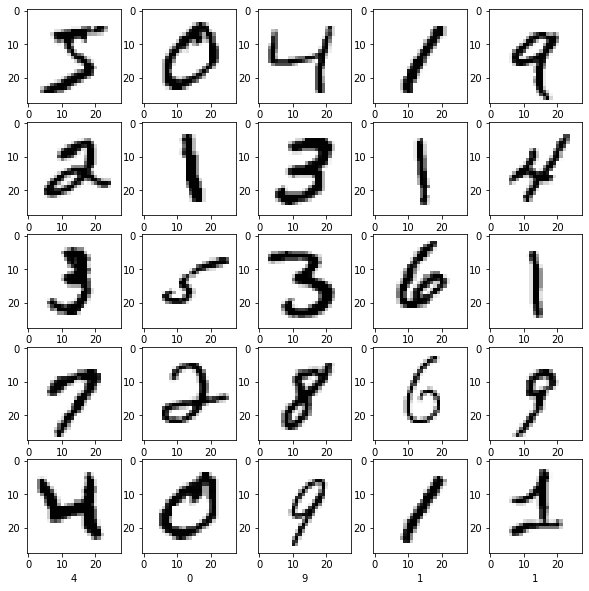

In [8]:
train_images = train_images / 255
test_images = test_images / 255

plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i], cmap='binary')
    plt.xlabel(train_labels[i])
    


In [9]:
model = keras.Sequential()
Arquitetura_CNN(model)

In [10]:
train_images = train_images.reshape(train_images.shape[0],
                                    train_images.shape[1],
                                    train_images.shape[2],
                                   1)

history = model.fit(train_images, train_labels,epochs=10,batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 32s 15ms/step - loss: 0.6736 - accuracy: 0.8672
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.4130 - accuracy: 0.8846
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3680 - accuracy: 0.8895
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3322 - accuracy: 0.8924
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3382 - accuracy: 0.8915
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3208 - accuracy: 0.8936
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3262 - accuracy: 0.8916
Epoch 8/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3089 - accuracy: 0.8944
Epoch 9/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3146 - accuracy: 0.8923
Epoch 10/10
1875/1875 [==============================] - 26s 14m

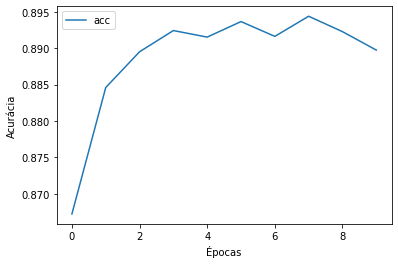

In [11]:
Plota_Grafico_Acuracia(history)

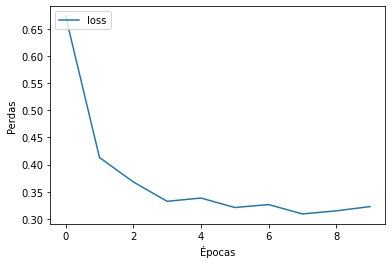

In [12]:
Plota_Grafico_Perdas(history)

In [13]:
test_images = (np.expand_dims(test_images,3))
test_images.shape

(10000, 28, 28, 1)

In [14]:
predictions = model.predict(test_images)
print("Scores para o objeto #0 no test: ")
print(predictions[0])
print("Classe predita = " + str(np.argmax(predictions[0])))

313/313 [==============================] - 1s 3ms/step
Scores para o objeto #0 no test: 
[9.9373084e-28 8.4281603e-26 3.5141693e-27 2.3466605e-22 4.1357337e-33
 2.0568981e-30 0.0000000e+00 1.0000000e+00 2.2788912e-29 2.0791471e-20]
Classe predita = 7


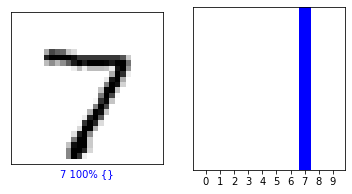

In [15]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
Plota_imagem_A_ser_preditada(i,predictions, test_labels, test_images[:,:,:,0])
plt.subplot(1,2,2)
Plota_valor_Preditado(i,predictions,test_labels)